# Predictions for Boarding House Prices in the Capital City of Indonesia

Here, I will make a prediction for boarding prices in Jakarta using data that I have collected myself from the website www.mamikos.com. Boarding prices will be determined based on area size and the facilities owned by the boarding house.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the Datasets

In [2]:
header = ["price", "width", "length", "facilities"]
dataset = pd.read_csv('.\data_kost_5.csv', names=header)
dataset

,price,width,length,facilities
0,1600000,3,3,"['Kasur', 'Lemari Baju', 'AC', 'Meja', 'WiFi',..."
1,2100000,4,4,"['Kasur', 'Lemari Baju', 'TV', 'AC', 'Meja', '..."
2,2600000,6,3,"['Kasur', 'Lemari Baju', 'TV', 'AC', 'Meja', '..."
3,1530000,3,3,"['Kasur', 'Lemari Baju', 'TV', 'AC', 'WiFi', '..."
4,1600000,4,4,"['Kasur', 'Lemari Baju', 'AC', 'WiFi', 'Meja R..."
...,...,...,...,...
393,800000,3,3,"['Kasur', 'Lemari Baju', 'WiFi', 'Kipas Angin'..."
394,925000,3,3,"['Kasur', 'Lemari Baju', 'WiFi', 'Kursi', 'Kip..."
395,1700000,3,3,"['AC', 'WiFi', 'Kloset Duduk', 'Akses 24 Jam']"
396,875000,3,3,"['Kasur', 'Lemari Baju', 'Meja', 'WiFi', 'Kurs..."


In [3]:
# Get all column into list elements
arr_width = dataset["width"].tolist()
arr_length = dataset["length"].tolist()
arr_facilities = dataset["facilities"].tolist()

### Get all the types facilities that we have

In [4]:
import ast
all_type_facilities = []
for element_1 in arr_facilities:
    # Casting element menjadi list menggunakan library ast
    for element_2 in ast.literal_eval(element_1):
        if element_2.lower() not in all_type_facilities:
            all_type_facilities.append(element_2.lower())
all_type_facilities

['kasur',
 'lemari baju',
 'ac',
 'meja',
 'wifi',
 'kursi',
 'k. mandi dalam',
 'kloset duduk',
 'shower',
 'ember mandi',
 'r. jemur',
 'akses 24 jam',
 'cctv',
 'parkir motor',
 'warung makan / rumah makan',
 'mini market / warung kelontong',
 'atm / bank',
 'apotek / klinik',
 'kampus / sekolah',
 'halte bus / pos ojek',
 'tv',
 'cleaning service',
 'pasutri tidak bawa anak',
 'bantal',
 'cermin',
 'r. tamu',
 'r. makan',
 'dapur',
 'laundry',
 'kulkas',
 'balcon',
 'jual makanan',
 'pengurus kos',
 'pusat belanja / mall',
 'maks. 2 orang/ kamar',
 'kasur single bed',
 'bisa pasutri',
 'tv kabel',
 'parkir sepeda',
 'meja rias',
 'kipas angin',
 'r. santai',
 'r. cuci',
 'taman',
 'dispenser air minum',
 'masjid',
 'k. mandi luar',
 'wastafel',
 'jendela menghadap kedalam & keluar',
 '-',
 'kloset jongkok',
 'bak mandi',
 'letak kamar di lt. 1',
 'kalau berdua tambah 200ribu',
 'guling',
 'jendela',
 'ventilasi',
 'mesin cuci',
 'khusus karyawan',
 'kartu akses',
 'penjaga keamanan

### How many type facilities that we have?

In [5]:
len(all_type_facilities)

155

Wow...

155 maybe too much to become the features. And not all features are important. Let's just select some

In [6]:
old_type_facilities = ["ac", "wifi", "k. mandi dalam", "Shower",
                      "TV", "Cleaning service",
                       "TV Kabel"
                      ]
new_type_facilities = []
for element in old_type_facilities:
    new_type_facilities.append(element.lower())
new_type_facilities

['ac',
 'wifi',
 'k. mandi dalam',
 'shower',
 'tv',
 'cleaning service',
 'tv kabel']

In [7]:
len(new_type_facilities)

7

### Get the size area of the boarding house's room

In [8]:
arr_area = []
for width, length in zip(arr_width, arr_length):
    # Cast to the right float format (using .)
    width = width.lower().replace(",", ".").replace("m", "")
    length = length.lower().replace(",", ".").replace("m", "")
    area = float(width) * float(length)
    arr_area.append(area)
arr_area

[9.0,
 16.0,
 18.0,
 9.0,
 16.0,
 6.6000000000000005,
 7.700000000000001,
 12.0,
 7.5,
 9.0,
 12.0,
 12.0,
 7.5,
 12.0,
 12.0,
 12.6,
 12.6,
 12.6,
 9.0,
 6.25,
 20.0,
 9.0,
 9.0,
 12.0,
 12.0,
 10.0,
 9.0,
 9.0,
 18.0,
 12.0,
 12.0,
 9.0,
 9.0,
 6.0,
 5.0,
 3.75,
 9.0,
 6.0,
 6.0,
 7.5,
 9.0,
 5.0,
 9.0,
 6.0,
 12.0,
 9.0,
 5.0,
 7.5,
 8.8,
 7.5,
 7.5,
 12.0,
 18.0,
 5.0,
 9.0,
 12.0,
 12.0,
 9.0,
 9.0,
 9.0,
 9.0,
 16.0,
 9.0,
 12.0,
 19.25,
 12.0,
 13.5,
 12.0,
 9.0,
 6.0,
 12.0,
 16.0,
 20.0,
 12.0,
 4.0,
 7.0,
 9.0,
 9.0,
 7.5,
 9.0,
 9.0,
 12.0,
 12.0,
 6.0,
 3.0,
 4.800000000000001,
 6.0,
 12.0,
 9.0,
 9.0,
 24.0,
 12.0,
 14.0,
 6.25,
 12.0,
 16.0,
 16.0,
 9.0,
 9.0,
 12.0,
 8.25,
 12.0,
 13.5,
 12.0,
 9.0,
 9.0,
 16.0,
 16.0,
 9.0,
 16.0,
 12.0,
 12.0,
 12.0,
 16.0,
 5.0,
 7.5,
 5.0,
 5.0,
 12.0,
 12.0,
 9.0,
 12.0,
 12.0,
 9.0,
 12.0,
 10.5,
 9.0,
 12.0,
 7.5,
 9.0,
 12.0,
 12.0,
 12.0,
 9.0,
 16.0,
 9.0,
 9.0,
 9.0,
 9.0,
 24.0,
 10.5,
 15.0,
 12.0,
 9.0,
 9.0,
 9.0,
 32.0,
 

Let's create a list to saved the each flag facility for every rows

In [9]:
dict_for_flags = {}
for element in new_type_facilities:
    dict_for_flags[element] = []
dict_for_flags

{'ac': [],
 'wifi': [],
 'k. mandi dalam': [],
 'shower': [],
 'tv': [],
 'cleaning service': [],
 'tv kabel': []}

### Get the flags for every type facilities

In [10]:
for row in arr_facilities:
    for element in new_type_facilities:
        # Saved the list from the "facilites" column
        arr_facilities = ast.literal_eval(row)
        new_arr_facilities = []
        # Lowercase each facilites element
        for facility in arr_facilities:
            new_arr_facilities.append(facility.lower())
        if element in new_arr_facilities:
            dict_for_flags[element].append(1)
        else:
            dict_for_flags[element].append(0)
dict_for_flags

{'ac': [1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,

Let's we adding the area size into dict_for_flags dictionary

In [11]:
dict_for_flags["area"] = arr_area
dict_for_flags["area"]

[9.0,
 16.0,
 18.0,
 9.0,
 16.0,
 6.6000000000000005,
 7.700000000000001,
 12.0,
 7.5,
 9.0,
 12.0,
 12.0,
 7.5,
 12.0,
 12.0,
 12.6,
 12.6,
 12.6,
 9.0,
 6.25,
 20.0,
 9.0,
 9.0,
 12.0,
 12.0,
 10.0,
 9.0,
 9.0,
 18.0,
 12.0,
 12.0,
 9.0,
 9.0,
 6.0,
 5.0,
 3.75,
 9.0,
 6.0,
 6.0,
 7.5,
 9.0,
 5.0,
 9.0,
 6.0,
 12.0,
 9.0,
 5.0,
 7.5,
 8.8,
 7.5,
 7.5,
 12.0,
 18.0,
 5.0,
 9.0,
 12.0,
 12.0,
 9.0,
 9.0,
 9.0,
 9.0,
 16.0,
 9.0,
 12.0,
 19.25,
 12.0,
 13.5,
 12.0,
 9.0,
 6.0,
 12.0,
 16.0,
 20.0,
 12.0,
 4.0,
 7.0,
 9.0,
 9.0,
 7.5,
 9.0,
 9.0,
 12.0,
 12.0,
 6.0,
 3.0,
 4.800000000000001,
 6.0,
 12.0,
 9.0,
 9.0,
 24.0,
 12.0,
 14.0,
 6.25,
 12.0,
 16.0,
 16.0,
 9.0,
 9.0,
 12.0,
 8.25,
 12.0,
 13.5,
 12.0,
 9.0,
 9.0,
 16.0,
 16.0,
 9.0,
 16.0,
 12.0,
 12.0,
 12.0,
 16.0,
 5.0,
 7.5,
 5.0,
 5.0,
 12.0,
 12.0,
 9.0,
 12.0,
 12.0,
 9.0,
 12.0,
 10.5,
 9.0,
 12.0,
 7.5,
 9.0,
 12.0,
 12.0,
 12.0,
 9.0,
 16.0,
 9.0,
 9.0,
 9.0,
 9.0,
 24.0,
 10.5,
 15.0,
 12.0,
 9.0,
 9.0,
 9.0,
 32.0,
 

Now, we will create the new DataFrame which will be concatenate with the main DataFrame

In [12]:
df_flags = pd.DataFrame(dict_for_flags)
df_flags

,ac,wifi,k. mandi dalam,shower,tv,cleaning service,tv kabel,area
0,1,1,1,1,0,0,0,9.0
1,1,1,1,1,1,1,0,16.0
2,1,1,1,1,1,1,0,18.0
3,1,1,1,1,1,1,1,9.0
4,1,1,1,0,0,0,0,16.0
...,...,...,...,...,...,...,...,...
393,0,1,0,1,0,0,0,9.0
394,0,1,0,0,1,0,0,9.0
395,1,1,0,0,0,0,0,9.0
396,0,1,1,0,0,0,0,9.0


In [13]:
dataset.columns

Index(['price', 'width', 'length', 'facilities'], dtype='object')

In [14]:
dataset.drop(['width', 'length', 'facilities'], axis=1, inplace=True)

In [15]:
new_df = pd.concat([dataset, df_flags], axis=1)
new_df.head()

,price,ac,wifi,k. mandi dalam,shower,tv,cleaning service,tv kabel,area
0,1600000,1,1,1,1,0,0,0,9.0
1,2100000,1,1,1,1,1,1,0,16.0
2,2600000,1,1,1,1,1,1,0,18.0
3,1530000,1,1,1,1,1,1,1,9.0
4,1600000,1,1,1,0,0,0,0,16.0


### Exploratory Data Analysis

Let's see the correlation of area size and the price

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [17]:
new_df[["price", "area"]].corr()

,price,area
price,1.000000,0.503678
area,0.503678,1.000000


(0, 4493139.926358859)

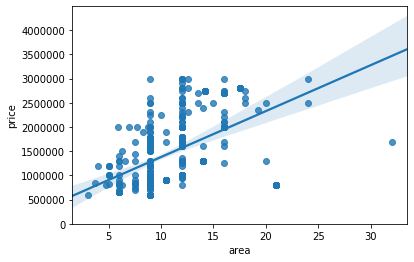

In [18]:
sns.regplot(x="area", y="price", data=new_df)
plt.ylim(0,)

Yeah, as we can see, the area and the price has positive correlations.

### Now,let's check all the categorical variables

In [100]:
from scipy import stats

In [19]:
new_type_facilities

['ac',
 'wifi',
 'k. mandi dalam',
 'shower',
 'tv',
 'cleaning service',
 'tv kabel']

Create a list for saved the "not good predictors".

In [20]:
not_good_predictors = []

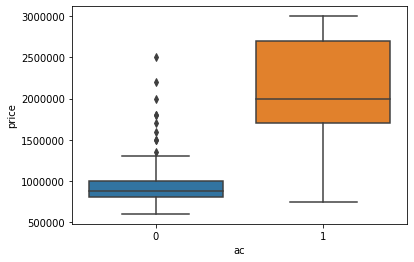

In [21]:
sns.boxplot(x=new_type_facilities[0], y="price", data=new_df)

Let's calculate the  Pearson Correlation Coefficient and P-value of 'ac' and 'price'.

In [103]:
# Let's calculate the  Pearson Correlation Coefficient and P-value of 'ac' and 'price'. 
pearson_coef, p_value = stats.pearsonr(new_df['ac'], new_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8045179758649881  with a P-value of P = 9.463119317771552e-76


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between "ac" and "price" is statistically significant, and the linear relationship is quite strong (~0.804, close to 1)</p>

As we can see from the Box Plot, we have the outliers data on the boarding house non AC, let's get rid of it...

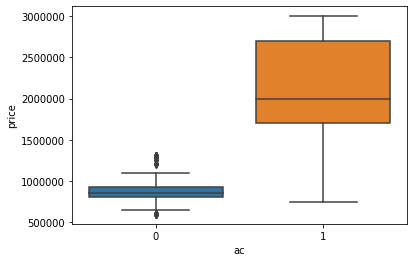

In [22]:
# Get only the Dataframe which "ac" parameter value is 0
ac_index = new_df["ac"]==0
df_ac = new_df[ac_index]

# After that, we calculate the range from Q1 and Q3
Q1 = df_ac['price'].quantile(0.25)
Q3 = df_ac['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

# Get the filtered row
filter = (df_ac['price'] >= Q1 - 1.5 * IQR) & (df_ac['price'] <= Q3 + 1.5 *IQR)

# Now, we get the index row which become outliers and drop from the main DataFrame
x = filter == 0
drop_index = list(x[x].index)
new_df.drop(drop_index, inplace=True)

# Make sure the outliers now is gone!!!
sns.boxplot(x="ac", y="price", data=new_df)

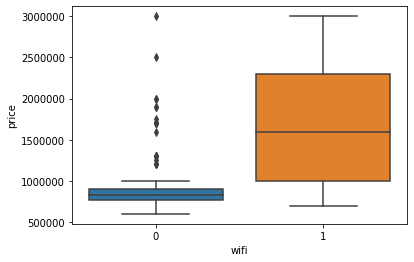

In [23]:
sns.boxplot(x=new_type_facilities[1], y="price", data=new_df)

Let's calculate the  Pearson Correlation Coefficient and P-value of 'wifi' and 'price'.

In [106]:
# Let's calculate the  Pearson Correlation Coefficient and P-value of 'wifi' and 'price'. 
pearson_coef, p_value = stats.pearsonr(new_df['wifi'], new_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5108441176277193  with a P-value of P = 3.355430349776618e-23


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.510)</p>

As we can see from the box plot, we have the outliers data on the boarding house non wifi, let's get rid of it...

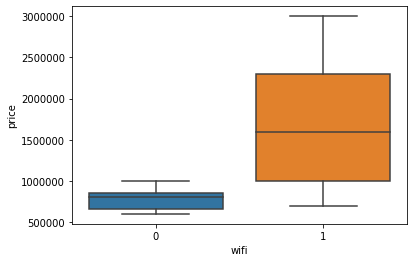

In [24]:
# Get only the Dataframe which "wifi" parameter value is 0
ac_index = new_df["wifi"]==0
df_ac = new_df[ac_index]

# After that, we calculate the range from Q1 and Q3
Q1 = df_ac['price'].quantile(0.25)
Q3 = df_ac['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

# Get the filtered row
filter = (df_ac['price'] >= Q1 - 1.5 * IQR) & (df_ac['price'] <= Q3 + 1.5 *IQR)

# Now, we get the index row which become outliers and drop from the main DataFrame
x = filter == 0
drop_index = list(x[x].index)
new_df.drop(drop_index, inplace=True)

# Make sure the outliers now is gone!!!
sns.boxplot(x="wifi", y="price", data=new_df)

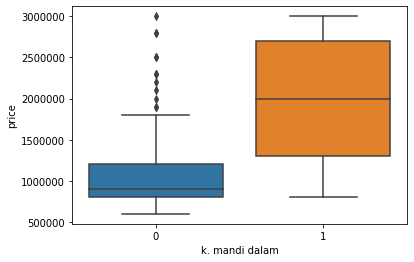

In [25]:
sns.boxplot(x=new_type_facilities[2], y="price", data=new_df)

Let's calculate the  Pearson Correlation Coefficient and P-value of 'k. mandi dalam' and 'price'.

In [108]:
# Let's calculate the  Pearson Correlation Coefficient and P-value of 'k. mandi dalam' and 'price'. 
pearson_coef, p_value = stats.pearsonr(new_df['k. mandi dalam'], new_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.6638332310229508  with a P-value of P = 4.9045601333794626e-43


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.663)</p>

As we can see, we have the outliers data on the boarding house non "k mandi dalam", let's get rid of it...

'K mandi dalam' means you have your private bathroom in your boarding house's room.

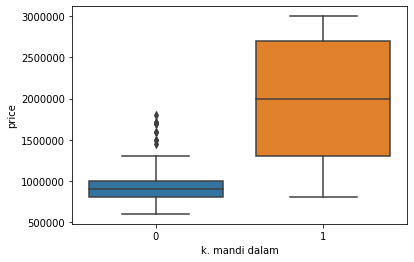

In [26]:
# Get only the Dataframe which "k mandi dalam" parameter value is 0
ac_index = new_df[new_type_facilities[2]]==0
df_ac = new_df[ac_index]

# After that, we calculate the range from Q1 and Q3
Q1 = df_ac['price'].quantile(0.25)
Q3 = df_ac['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

# Get the filtered row
filter = (df_ac['price'] >= Q1 - 1.5 * IQR) & (df_ac['price'] <= Q3 + 1.5 *IQR)

# Now, we get the index row which become outliers and drop from the main DataFrame
x = filter == 0
drop_index = list(x[x].index)
new_df.drop(drop_index, inplace=True)

# Make sure the outliers now is gone!!!
sns.boxplot(x=new_type_facilities[2], y="price", data=new_df)

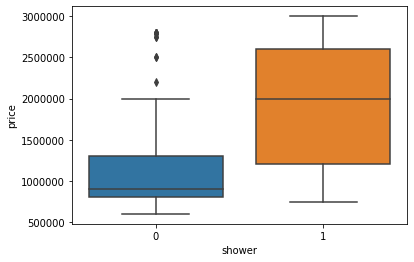

In [27]:
sns.boxplot(x=new_type_facilities[3], y="price", data=new_df)

Let's calculate the  Pearson Correlation Coefficient and P-value of 'shower' and 'price'.

In [109]:
# Let's calculate the  Pearson Correlation Coefficient and P-value of 'shower' and 'price'. 
pearson_coef, p_value = stats.pearsonr(new_df['shower'], new_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5813336627485981  with a P-value of P = 4.823256522145045e-31


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.581)</p>

As we can see from the boxplot, we have the outliers data on the boarding house non "shower", let's get rid of it...

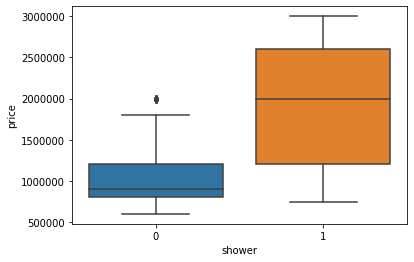

In [28]:
# Get only the Dataframe which "shower" parameter value is 0
ac_index = new_df["shower"]==0
df_ac = new_df[ac_index]

# After that, we calculate the range from Q1 and Q3
Q1 = df_ac['price'].quantile(0.25)
Q3 = df_ac['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

# Get the filtered row
filter = (df_ac['price'] >= Q1 - 1.5 * IQR) & (df_ac['price'] <= Q3 + 1.5 *IQR)

# Now, we get the index row which become outliers and drop from the main DataFrame
x = filter == 0
drop_index = list(x[x].index)
new_df.drop(drop_index, inplace=True)

# Make sure the outliers now is gone!!!
sns.boxplot(x="shower", y="price", data=new_df)

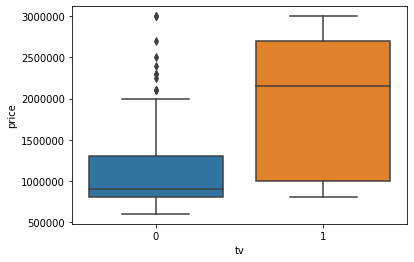

In [29]:
sns.boxplot(x=new_type_facilities[4], y="price", data=new_df)

Let's calculate the  Pearson Correlation Coefficient and P-value of 'tv' and 'price'.

In [112]:
# Let's calculate the  Pearson Correlation Coefficient and P-value of 'tv' and 'price'. 
pearson_coef, p_value = stats.pearsonr(new_df['tv'], new_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5804184418581451  with a P-value of P = 6.274957106054516e-31


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.580)</p>

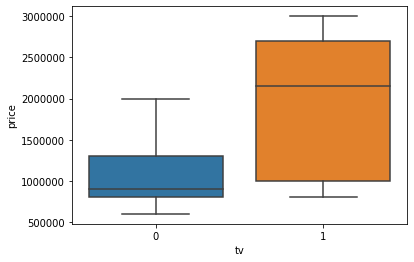

In [30]:
# Get only the Dataframe which "shower" parameter value is 0
ac_index = new_df["tv"]==0
df_ac = new_df[ac_index]

# After that, we calculate the range from Q1 and Q3
Q1 = df_ac['price'].quantile(0.25)
Q3 = df_ac['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

# Get the filtered row
filter = (df_ac['price'] >= Q1 - 1.5 * IQR) & (df_ac['price'] <= Q3 + 1.5 *IQR)

# Now, we get the index row which become outliers and drop from the main DataFrame
x = filter == 0
drop_index = list(x[x].index)
new_df.drop(drop_index, inplace=True)

# Make sure the outliers now is gone!!!
sns.boxplot(x="tv", y="price", data=new_df)

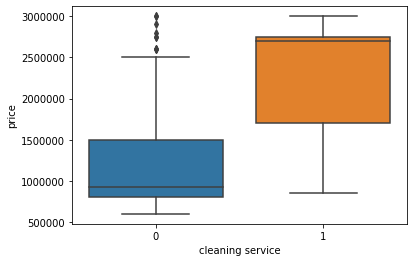

In [31]:
sns.boxplot(x=new_type_facilities[5], y="price", data=new_df)

Let's calculate the  Pearson Correlation Coefficient and P-value of 'cleaning service' and 'price'. 

In [114]:
# Let's calculate the  Pearson Correlation Coefficient and P-value of 'cleaning service' and 'price'. 
pearson_coef, p_value = stats.pearsonr(new_df['cleaning service'], new_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5538086524019562  with a P-value of P = 9.299076511754309e-28


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.553)</p>

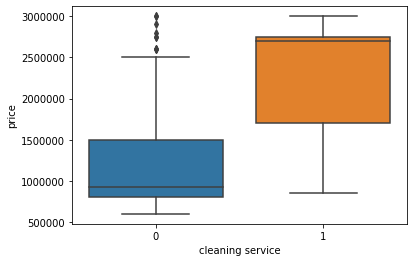

In [32]:
# Get only the Dataframe which "tv kabel" parameter value is 1
ac_index = new_df[new_type_facilities[5]]==1
df_ac = new_df[ac_index]

# After that, we calculate the range from Q1 and Q3
Q1 = df_ac['price'].quantile(0.25)
Q3 = df_ac['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

# Get the filtered row
filter = (df_ac['price'] >= Q1 - 1.5 * IQR) & (df_ac['price'] <= Q3 + 1.5 *IQR)

# Now, we get the index row which become outliers and drop from the main DataFrame
x = filter == 0
drop_index = list(x[x].index)
new_df.drop(drop_index, inplace=True)

# Make sure the outliers now is gone!!!
sns.boxplot(x=new_type_facilities[5], y="price", data=new_df)

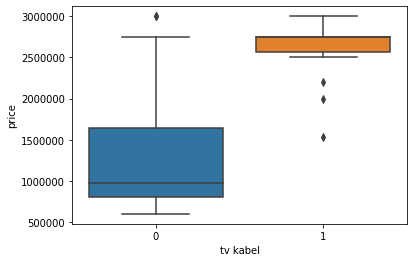

In [33]:
sns.boxplot(x=new_type_facilities[6], y="price", data=new_df)

So from the box plot, we know that these features are not good to be predictors :
- meja
- kursi
- kloset duduk
- r. jemur
- parkir motor
- dapur
- laundry
- kulkas
- balcon
- single bed
- pusat belanja / mall
- kompor
- mini market / warung kelontong
- atm / bank
- dispenser air minum

Let's we drop it from the main DataFrame

In [34]:
# not_good_predictors
# len(not_good_predictors)
# new_df.drop(not_good_predictors, axis=1, inplace=True)

### Value Counts

Let's we count the value for every column is make sense or not to become a predictors

In [35]:
new_df.columns

Index(['price', 'ac', 'wifi', 'k. mandi dalam', 'shower', 'tv',
       'cleaning service', 'tv kabel', 'area'],
      dtype='object')

In [36]:
new_df['ac'].value_counts()

0    189
1    139
Name: ac, dtype: int64

In [37]:
new_df['wifi'].value_counts()

1    238
0     90
Name: wifi, dtype: int64

In [38]:
new_df['k. mandi dalam'].value_counts()

0    192
1    136
Name: k. mandi dalam, dtype: int64

In [39]:
new_df['shower'].value_counts()

0    206
1    122
Name: shower, dtype: int64

In [40]:
new_df['tv'].value_counts()

0    238
1     90
Name: tv, dtype: int64

In [41]:
new_df['cleaning service'].value_counts()

0    283
1     45
Name: cleaning service, dtype: int64

In [42]:
new_df['tv kabel'].value_counts()

0    306
1     22
Name: tv kabel, dtype: int64

In [43]:
new_df.drop(['tv kabel'], axis=1, inplace=True)

In [44]:
new_df.head()

,price,ac,wifi,k. mandi dalam,shower,tv,cleaning service,area
0,1600000,1,1,1,1,0,0,9.0
1,2100000,1,1,1,1,1,1,16.0
2,2600000,1,1,1,1,1,1,18.0
3,1530000,1,1,1,1,1,1,9.0
4,1600000,1,1,1,0,0,0,16.0


# Data Normalization

In [45]:
from sklearn import preprocessing

In [46]:
Features = new_df[["ac", "wifi", "k. mandi dalam", "shower", "cleaning service", "tv", "area"]]
Features.head()
X = Features

In [47]:
y = new_df["price"].values
y[0:5]

array([1600000, 2100000, 2600000, 1530000, 1600000], dtype=int64)

In [48]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.16606699,  0.61494005,  1.18817705,  1.29943241, -0.39876133,
        -0.61494005, -0.46810549],
       [ 1.16606699,  0.61494005,  1.18817705,  1.29943241,  2.50776572,
         1.62617479,  1.47721517],
       [ 1.16606699,  0.61494005,  1.18817705,  1.29943241,  2.50776572,
         1.62617479,  2.03302107],
       [ 1.16606699,  0.61494005,  1.18817705,  1.29943241,  2.50776572,
         1.62617479, -0.46810549],
       [ 1.16606699,  0.61494005,  1.18817705, -0.76956677, -0.39876133,
        -0.61494005,  1.47721517]])

# Train the Model

Let's create a dictionary to save the result.

In [49]:
dict_results = {"Algorithm" : [], "R^2 score" : [], "MSE" : []}

## Splitting the dataset into the Training set and Test set

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
result_r2 = regressor.score(X_test,y_test)
dict_results["Algorithm"].append("Multiple Linear Regressgion")
dict_results["R^2 score"].append(result_r2)

## Predicting the Test set results

In [52]:
y_pred = regressor.predict(X_test)

### Get Mean Square Error (MSE) For Multiple Linear Regression

In [53]:
from sklearn.metrics import mean_squared_error
result_mse = mean_squared_error(y_test, y_pred)
dict_results["MSE"].append(result_mse)

### Let's we plot the data

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Function for Plotting

In [55]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

### We will see our model in overfitting, underfitting, or not

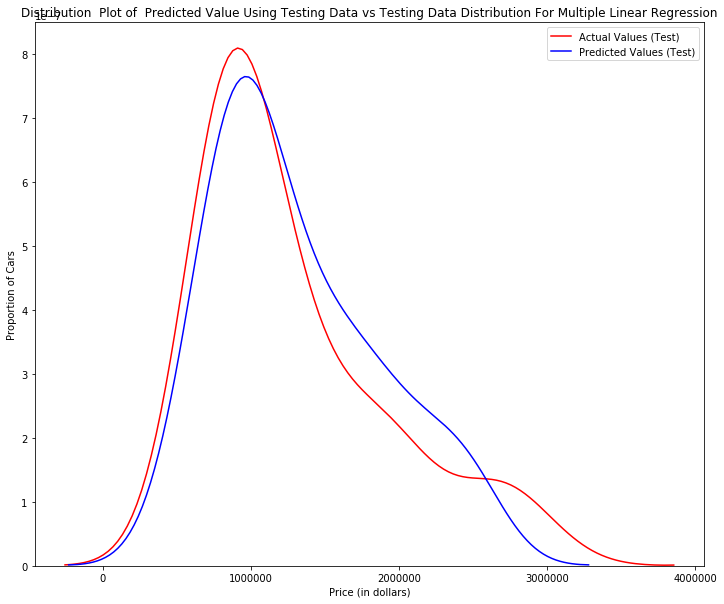

In [56]:
Title = 'Distribution  Plot of  Predicted Value Using Testing Data vs Testing Data Distribution For Multiple Linear Regression'
DistributionPlot(y_test, y_pred, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [57]:
from sklearn.model_selection import cross_val_score
# Write your code below and press Shift+Enter to execute 
Rc=cross_val_score(regressor,X_train, y_train,cv=4)
Rc.mean()

0.8182975224193899

## Training the Polynomial Regression on the Training Set

Let's see how the R^2 changes on the test data for different order polynomials and plot the results:

Text(3, 0.75, 'Maximum R^2 ')

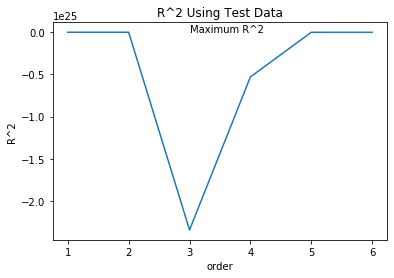

In [58]:
from sklearn.preprocessing import PolynomialFeatures
lr = LinearRegression()
Rsqu_test = []

order = [1, 2, 3, 4, 5, 6]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(X_train)
    
    x_test_pr = pr.fit_transform(X_test)    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

Let's using 2 degree Polynomial

In [59]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
result_r2 = lin_reg_2.score(poly_reg.fit_transform(X_test), y_test)
dict_results["Algorithm"].append("Polynomial Regression (2 Degree)")
dict_results["R^2 score"].append(result_r2)

In [60]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))

### Get Mean Square Error (MSE) For Polynomial Regression

In [61]:
from sklearn.metrics import mean_squared_error
mse_score = mean_squared_error(y_test, y_pred)
dict_results["MSE"].append(mse_score)

### We will see our model in overfitting, underfitting, or not

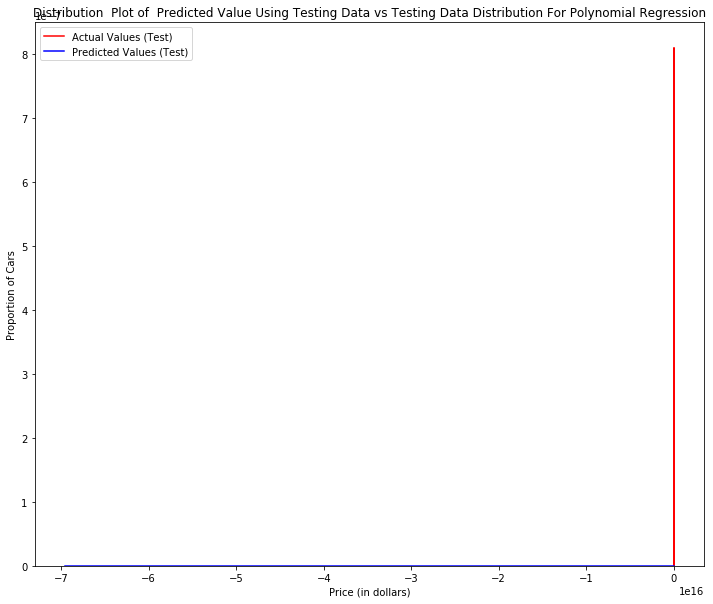

In [62]:
Title = 'Distribution  Plot of  Predicted Value Using Testing Data vs Testing Data Distribution For Polynomial Regression'
DistributionPlot(y_test, y_pred, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [63]:
from sklearn.model_selection import cross_val_score
# Write your code below and press Shift+Enter to execute 
Rc=cross_val_score(lin_reg_2, poly_reg.fit_transform(X_train), y_train,cv=4)
Rc.mean()

-8.934098068233098e+21

## Training the SVR model

In [64]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
result_r2 = regressor.score(X_test, y_test)
dict_results["Algorithm"].append("Support Vector Regression")
dict_results["R^2 score"].append(result_r2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [65]:
y_pred = regressor.predict(X_test)

### Get Mean Square Error (MSE) For SVR

In [66]:
from sklearn.metrics import mean_squared_error
result_mse = mean_squared_error(y_test, y_pred)
dict_results["MSE"].append(result_mse)

### We will see our model in overfitting, underfitting, or not

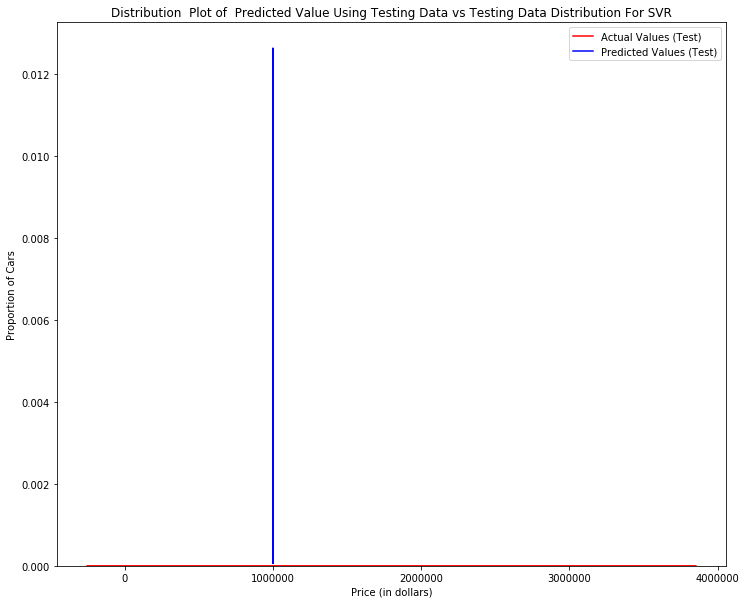

In [67]:
Title = 'Distribution  Plot of  Predicted Value Using Testing Data vs Testing Data Distribution For SVR'
DistributionPlot(y_test, y_pred, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [68]:
from sklearn.model_selection import cross_val_score
# Write your code below and press Shift+Enter to execute 
Rc=cross_val_score(regressor, X_train, y_train,cv=4)
Rc.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

-0.26955375248890245

## Training the Decision Tree Regression model

In [69]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
result_r2 = regressor.score(X_test, y_test)
dict_results["Algorithm"].append("Decision Tree Regression")
dict_results["R^2 score"].append(result_r2)

In [70]:
y_pred = regressor.predict(X_test)

### Get Mean Square Error (MSE) For Decision Tree Regression

In [71]:
from sklearn.metrics import mean_squared_error
result_mse = mean_squared_error(y_test, y_pred)
dict_results["MSE"].append(result_mse)

### We will see our model in overfitting, underfitting, or not

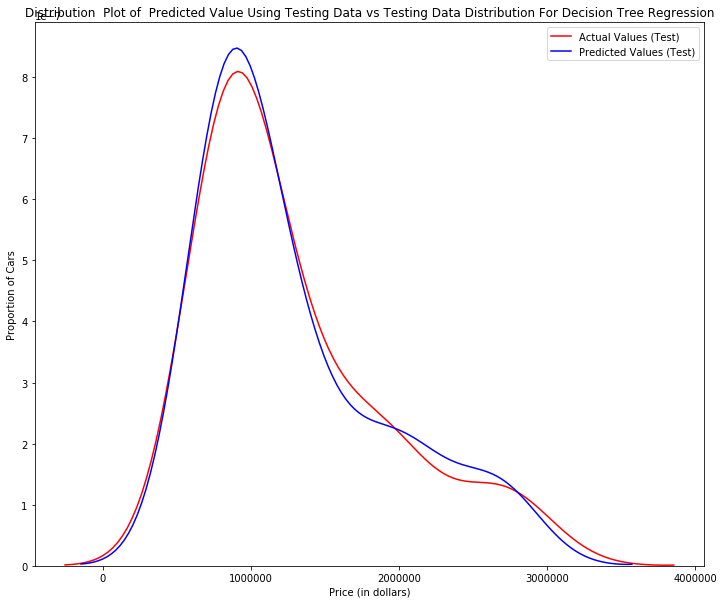

In [72]:
Title = 'Distribution  Plot of  Predicted Value Using Testing Data vs Testing Data Distribution For Decision Tree Regression'
DistributionPlot(y_test, y_pred, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [73]:
from sklearn.model_selection import cross_val_score
# Write your code below and press Shift+Enter to execute 
Rc=cross_val_score(regressor, X_train, y_train,cv=4)
Rc.mean()

0.8964873950060671

## Training the Random Forest Regression model

In [94]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
result_r2 = regressor.score(X_test, y_test)
dict_results["Algorithm"].append("Random Forest Regression")
dict_results["R^2 score"].append(result_r2)

In [95]:
y_pred = regressor.predict(X_test)

### Get Mean Square Error (MSE) for Random Forest Regression

In [96]:
from sklearn.metrics import mean_squared_error
result_mse = mean_squared_error(y_test, y_pred)
dict_results["MSE"].append(result_mse)

### We will see our model in overfitting, underfitting, or not

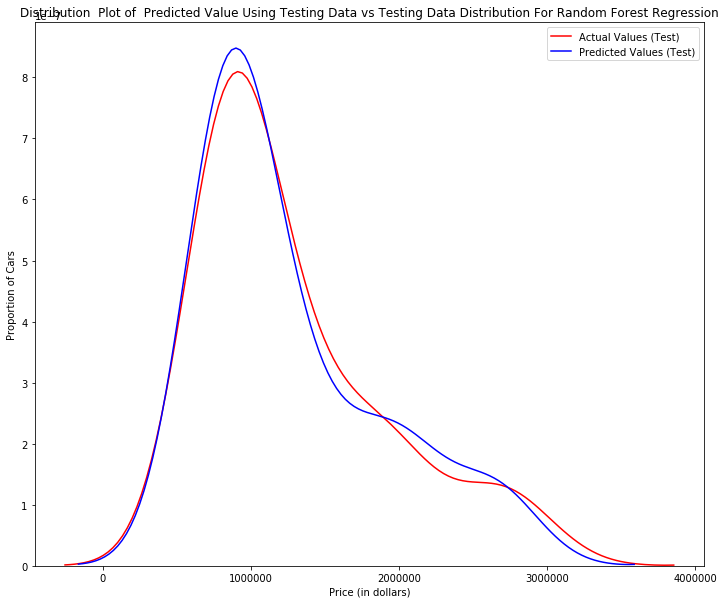

In [97]:
Title = 'Distribution  Plot of  Predicted Value Using Testing Data vs Testing Data Distribution For Random Forest Regression'
DistributionPlot(y_test, y_pred, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [98]:
from sklearn.model_selection import cross_val_score
# Write your code below and press Shift+Enter to execute 
Rc=cross_val_score(regressor, X_train, y_train,cv=4)
Rc.mean()

0.917869148942945

# Conclusion

Now, lets we see the result

In [79]:
dict_results

{'Algorithm': ['Multiple Linear Regressgion',
  'Polynomial Regression (2 Degree)',
  'Support Vector Regression',
  'Decision Tree Regression',
  'Random Forest Regression'],
 'R^2 score': [0.7808039696757049,
  -1.909506739885691e+20,
  -0.21973133832152136,
  0.901295928822747,
  0.9087641723058162],
 'MSE': [84165318957.18091,
  7.331986969635954e+31,
  468343687520.33716,
  37899681033.06938,
  35032078486.28762]}

In [80]:
results_df = pd.DataFrame(dict_results)
results_df

,Algorithm,R^2 score,MSE
0,Multiple Linear Regressgion,7.808040e-01,8.416532e+10
1,Polynomial Regression (2 Degree),-1.909507e+20,7.331987e+31
2,Support Vector Regression,-2.197313e-01,4.683437e+11
3,Decision Tree Regression,9.012959e-01,3.789968e+10
4,Random Forest Regression,9.087642e-01,3.503208e+10


In [81]:
new_df

,price,ac,wifi,k. mandi dalam,shower,tv,cleaning service,area
0,1600000,1,1,1,1,0,0,9.0
1,2100000,1,1,1,1,1,1,16.0
2,2600000,1,1,1,1,1,1,18.0
3,1530000,1,1,1,1,1,1,9.0
4,1600000,1,1,1,0,0,0,16.0
...,...,...,...,...,...,...,...,...
393,800000,0,1,0,1,0,0,9.0
394,925000,0,1,0,0,1,0,9.0
395,1700000,1,1,0,0,0,0,9.0
396,875000,0,1,1,0,0,0,9.0


Now, as we can see, the best result if we using Random Forest Algorithm.